In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("combined.csv")

/Users/ayusharora/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,15,27,28,29,35,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_bip = data[(data['PlayResult'] != 'Undefined')]
data_bip = data_bip[(data_bip['PlayResult'] != 'HomeRun')]
data_bip = data_bip[(data_bip['PlayResult'] != 'Sacrifice')]
data_bip = data_bip[(data_bip['PlayResult'] != 'FieldersChoice')]
data_bip = data_bip[(data_bip['PlayResult'] != 'Error')]



In [4]:
data_bip.to_csv('BIP.csv')

In [5]:
data_bip.shape # 8697 rows

(8487, 76)

In [6]:
data_bip.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8487 entries, 8 to 53380
Data columns (total 76 columns):
Unnamed: 0             8487 non-null int64
Angle                  7167 non-null float64
AutoPitchType          8487 non-null object
AwayTeam               8487 non-null object
Balls                  8487 non-null int64
Batter                 8487 non-null object
BatterId               8487 non-null float64
BatterSide             8487 non-null object
BatterTeam             8487 non-null object
Bearing                7133 non-null float64
Date                   562 non-null object
Direction              7167 non-null float64
Distance               7133 non-null float64
ExitSpeed              7167 non-null float64
Extension              8431 non-null float64
GameID                 562 non-null object
HangTime               7133 non-null float64
HitSpinRate            4661 non-null float64
HitType                8487 non-null object
HomeTeam               8487 non-null object
HorzApp

In [7]:
data_bip.loc[(data_bip.PitcherThrows == 'Right'), 'PitcherThrows'] = 1

data_bip.loc[(data_bip.PitcherThrows == 'Left'), 'PitcherThrows'] = 0

data_bip.loc[(data_bip.BatterSide == 'Right'), 'BatterSide'] = 1

data_bip.loc[(data_bip.BatterSide == 'Left'), 'BatterSide'] = 0

In [8]:
data_bip.to_csv('BIP_withHandedness.csv')

In [9]:
# Select only numerable columns (ints & floats)
data_bip_numerical = data_bip.select_dtypes(include = ['int64', 'float64'])

In [10]:
data_bip_numerical['PlayResult'] = data_bip['PlayResult']

/Users/ayusharora/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data_bip_numerical.to_csv('BIP_numerical.csv')

In [12]:
data_bip_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8487 entries, 8 to 53380
Data columns (total 54 columns):
Unnamed: 0             8487 non-null int64
Angle                  7167 non-null float64
Balls                  8487 non-null int64
BatterId               8487 non-null float64
BatterSide             8487 non-null int64
Bearing                7133 non-null float64
Direction              7167 non-null float64
Distance               7133 non-null float64
ExitSpeed              7167 non-null float64
Extension              8431 non-null float64
HangTime               7133 non-null float64
HitSpinRate            4661 non-null float64
HorzApprAngle          8431 non-null float64
HorzBreak              8431 non-null float64
HorzRelAngle           8431 non-null float64
InducedVertBreak       8431 non-null float64
Inning                 8487 non-null int64
LastTrackedDistance    7133 non-null float64
Outs                   8487 non-null int64
OutsOnPlay             8487 non-null int64
PAof

In [13]:
data_bip_numerical = data_bip_numerical.loc[:, data_bip_numerical.columns != 'Unnamed: 0']

In [14]:
X = data_bip_numerical.iloc[:,0:51]
y = data_bip_numerical.iloc[:,-1]

In [15]:
y.count()

8487

In [16]:
data_bip_numerical = data_bip_numerical.dropna(subset = ['Angle', 'HangTime','Direction','LastTrackedDistance','ExitSpeed','PlayResult'])

In [17]:
# Angle, Hang Time, Last Tracked Distance, Exit Speed
data_bip_numerical.isna().any()

Angle                  False
Balls                  False
BatterId               False
BatterSide             False
Bearing                False
Direction              False
Distance               False
ExitSpeed              False
Extension              False
HangTime               False
HitSpinRate             True
HorzApprAngle          False
HorzBreak              False
HorzRelAngle           False
InducedVertBreak       False
Inning                 False
LastTrackedDistance    False
Outs                   False
OutsOnPlay             False
PAofInning             False
PitchNo                False
PitcherId              False
PitcherThrows          False
PitchofPA              False
PlateLocHeight         False
PlateLocSide           False
PositionAt110X          True
PositionAt110Y          True
PositionAt110Z          True
RelHeight              False
RelSide                False
RelSpeed               False
RunsScored             False
SpinAxis               False
SpinRate      

In [18]:
# Getting rid of NAN Values
data_missing = data_bip_numerical.isna()
data_num_missing = data_missing.sum()
data_num_missing/ len(data_bip_numerical) * 100

# 50% of PositionAt110X is missing
# 45% of HitSpinRate is missing
# 17% of Distance,Bearing is missing
# 17% of ExitSpeed, Angle, Direction are missing

# Get rid of all rows with any NA values?
#data_bip_numerical = data_bip_numerical.dropna() # Down to 3813 rows of data




Angle                   0.000000
Balls                   0.000000
BatterId                0.000000
BatterSide              0.000000
Bearing                 0.000000
Direction               0.000000
Distance                0.000000
ExitSpeed               0.000000
Extension               0.000000
HangTime                0.000000
HitSpinRate            34.796019
HorzApprAngle           0.000000
HorzBreak               0.000000
HorzRelAngle            0.000000
InducedVertBreak        0.000000
Inning                  0.000000
LastTrackedDistance     0.000000
Outs                    0.000000
OutsOnPlay              0.000000
PAofInning              0.000000
PitchNo                 0.000000
PitcherId               0.000000
PitcherThrows           0.000000
PitchofPA               0.000000
PlateLocHeight          0.000000
PlateLocSide            0.000000
PositionAt110X         41.511286
PositionAt110Y         41.511286
PositionAt110Z         41.511286
RelHeight               0.000000
RelSide   

In [19]:
data_bip_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7133 entries, 8 to 53380
Data columns (total 53 columns):
Angle                  7133 non-null float64
Balls                  7133 non-null int64
BatterId               7133 non-null float64
BatterSide             7133 non-null int64
Bearing                7133 non-null float64
Direction              7133 non-null float64
Distance               7133 non-null float64
ExitSpeed              7133 non-null float64
Extension              7133 non-null float64
HangTime               7133 non-null float64
HitSpinRate            4651 non-null float64
HorzApprAngle          7133 non-null float64
HorzBreak              7133 non-null float64
HorzRelAngle           7133 non-null float64
InducedVertBreak       7133 non-null float64
Inning                 7133 non-null int64
LastTrackedDistance    7133 non-null float64
Outs                   7133 non-null int64
OutsOnPlay             7133 non-null int64
PAofInning             7133 non-null int64
Pitc

In [20]:
data_bip_numerical.to_csv('BIP_numerical_NA.csv')

In [21]:
data_bip_numerical['PlayResult'].unique() # ponder which events to be included in hit/out

array(['Double', 'Single', 'Out', 'Triple'], dtype=object)

In [22]:
# Converting Play Result to Out (0) or Hit (1)
data_bip_numerical.loc[(data_bip_numerical.PlayResult != 'Out'), 'PlayResult'] = 1


In [23]:
data_bip_numerical.loc[(data_bip_numerical.PlayResult == 'Out'), 'PlayResult'] = 0


In [24]:
# DIRECTION CONSTRAINT
data_bip_numerical = data_bip_numerical[data_bip_numerical['Direction'].abs()<=45]


In [25]:
# GROUNDBALL CONSTRAINT
data_bip_numerical = data_bip_numerical[data_bip_numerical['Angle']<=5]
data_bip_numerical = data_bip_numerical[data_bip_numerical['LastTrackedDistance']<=180]

In [26]:
data_bip_numerical.to_csv('BIP_numerical_NA_groundballs.csv')

In [27]:
data_bip_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2720 entries, 18 to 53366
Data columns (total 53 columns):
Angle                  2720 non-null float64
Balls                  2720 non-null int64
BatterId               2720 non-null float64
BatterSide             2720 non-null int64
Bearing                2720 non-null float64
Direction              2720 non-null float64
Distance               2720 non-null float64
ExitSpeed              2720 non-null float64
Extension              2720 non-null float64
HangTime               2720 non-null float64
HitSpinRate            609 non-null float64
HorzApprAngle          2720 non-null float64
HorzBreak              2720 non-null float64
HorzRelAngle           2720 non-null float64
InducedVertBreak       2720 non-null float64
Inning                 2720 non-null int64
LastTrackedDistance    2720 non-null float64
Outs                   2720 non-null int64
OutsOnPlay             2720 non-null int64
PAofInning             2720 non-null int64
Pitc

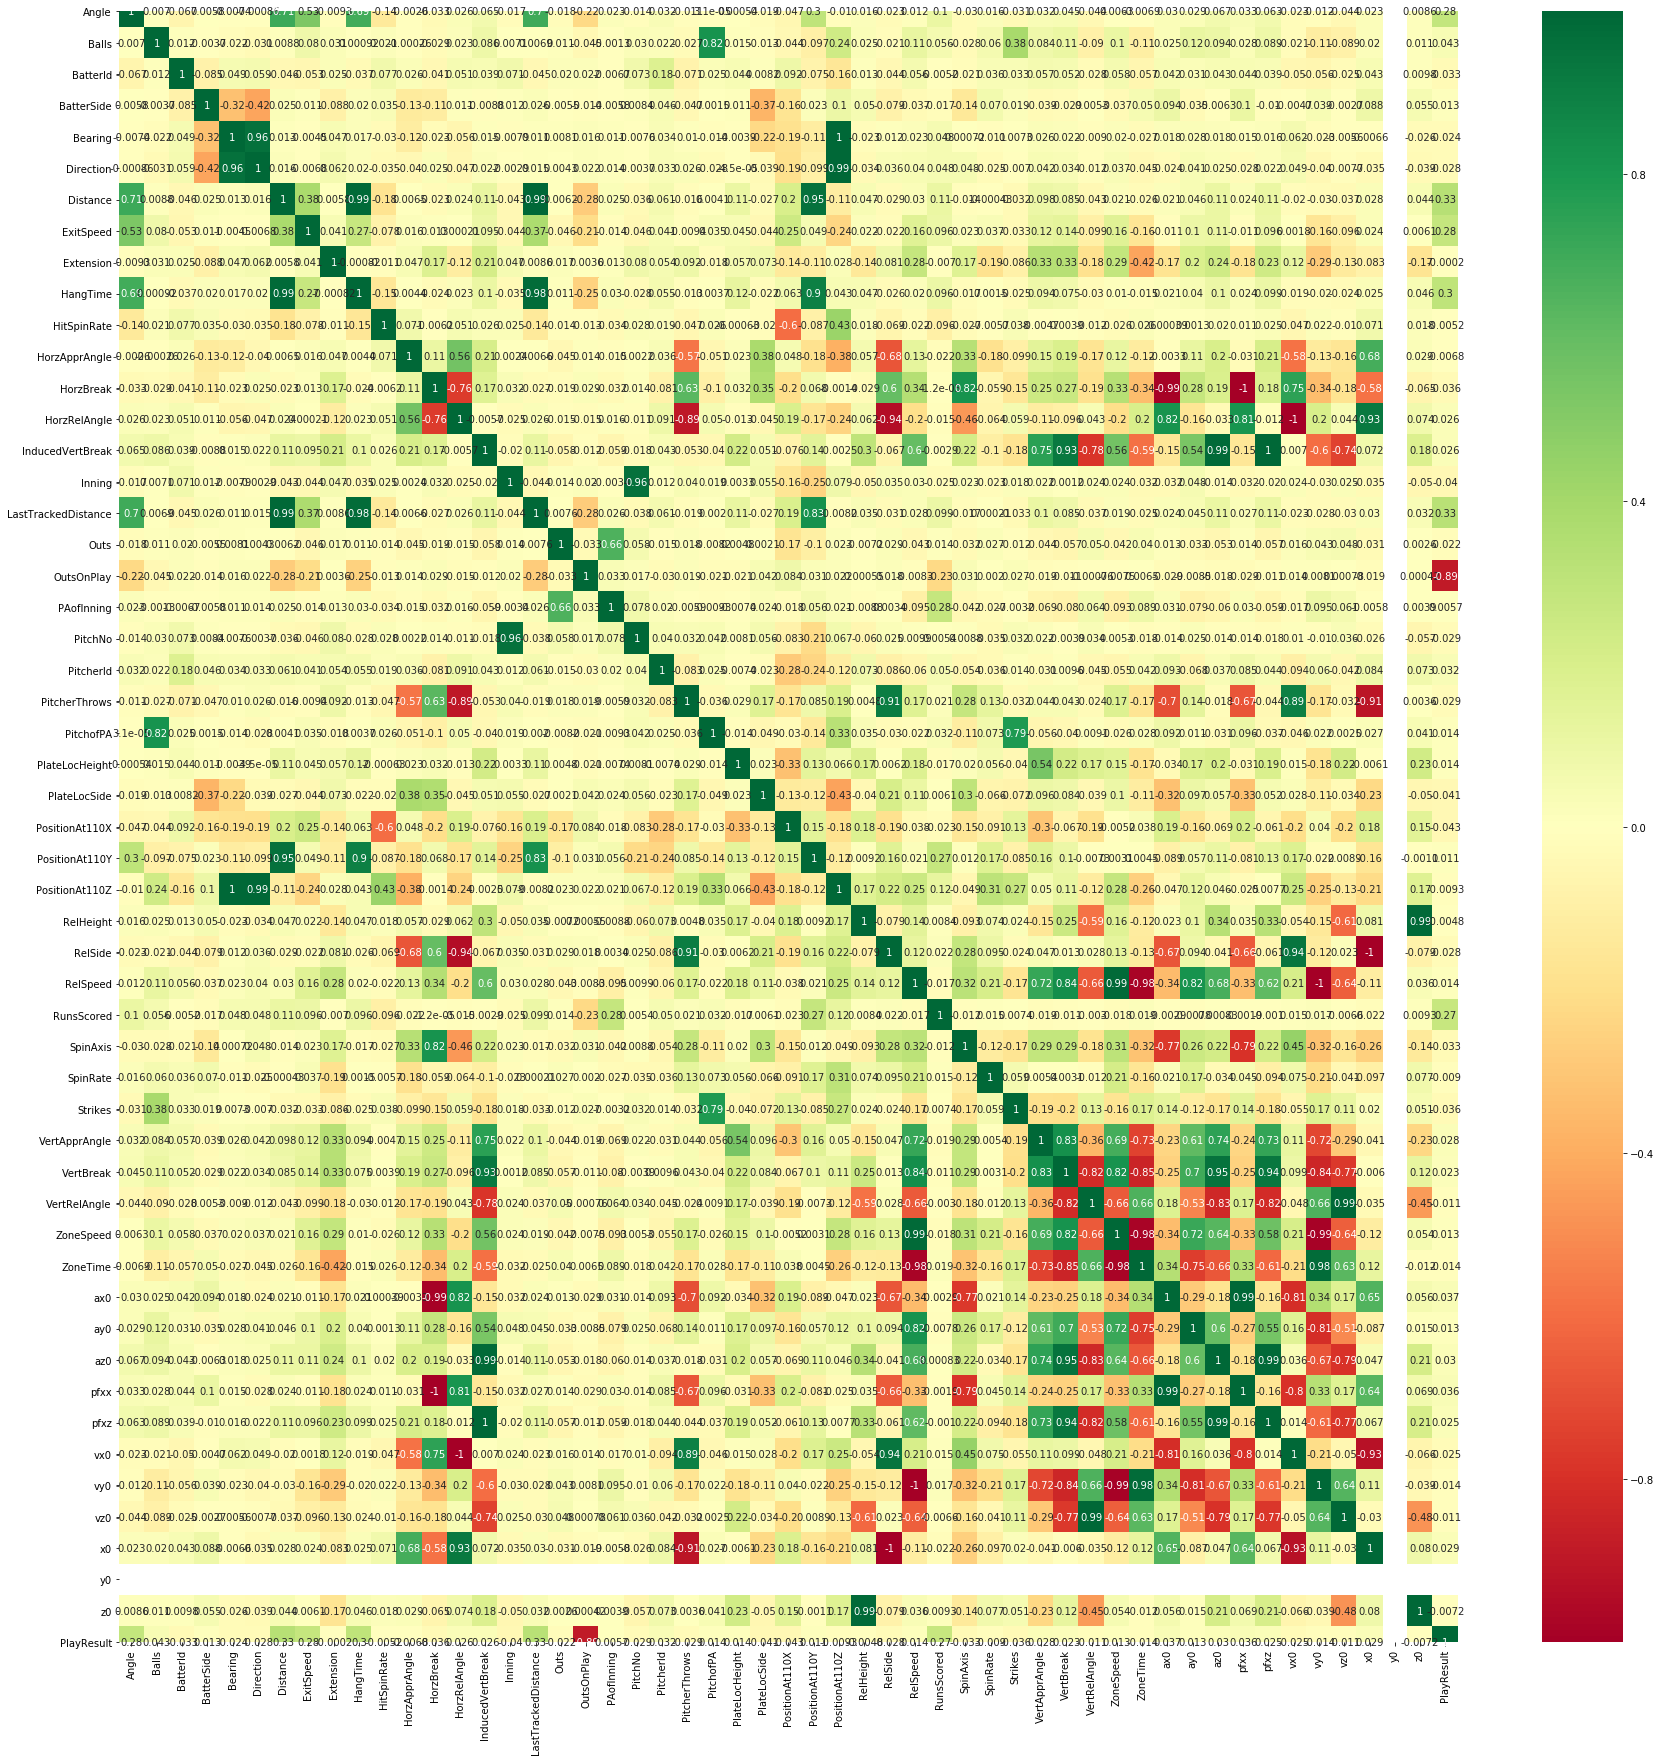

In [28]:
# Correlation Matrix

corrmat = data_bip_numerical.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (30,30))
g = sns.heatmap(data_bip_numerical[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
# Grab numbers for just play result vs all

(data_bip_numerical[top_corr_features].corr()).to_csv('correct_corr_groundballs.csv')